In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Data Ingestion

### 1.	Load the dataset into a DataFrame.

In [2]:
df=pd.read_csv("C:/Users/bikki/Downloads/laptop_price - dataset.csv")
df

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel,Core i7 6500U,2.5,4,128GB SSD,Intel,HD Graphics 520,Windows 10,1.80,638.00
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel,Core i7 6500U,2.5,16,512GB SSD,Intel,HD Graphics 520,Windows 10,1.30,1499.00
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel,Celeron Dual Core N3050,1.6,2,64GB Flash Storage,Intel,HD Graphics,Windows 10,1.50,229.00
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel,Core i7 6500U,2.5,6,1TB HDD,AMD,Radeon R5 M330,Windows 10,2.19,764.00


### 2.	Inspect the number of rows and columns, column names, and data types.

In [3]:
df.shape

(1275, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Company          1275 non-null   object 
 6   CPU_Type             1275 non-null   object 
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   Memory               1275 non-null   object 
 10  GPU_Company          1275 non-null   object 
 11  GPU_Type             1275 non-null   object 
 12  OpSys                1275 non-null   object 
 13  Weight (kg)          1275 non-null   float64
 14  Price (Euro)         1275 non-null   float64
dtypes: float64(4), int64(1), object(10)
me

### 3.	Check for missing values and duplicates.

In [5]:
df.isnull().sum()

Company                0
Product                0
TypeName               0
Inches                 0
ScreenResolution       0
CPU_Company            0
CPU_Type               0
CPU_Frequency (GHz)    0
RAM (GB)               0
Memory                 0
GPU_Company            0
GPU_Type               0
OpSys                  0
Weight (kg)            0
Price (Euro)           0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

## Part 2: Data Understanding and Exploration (EDA)

### 1.	Univariate Analysis

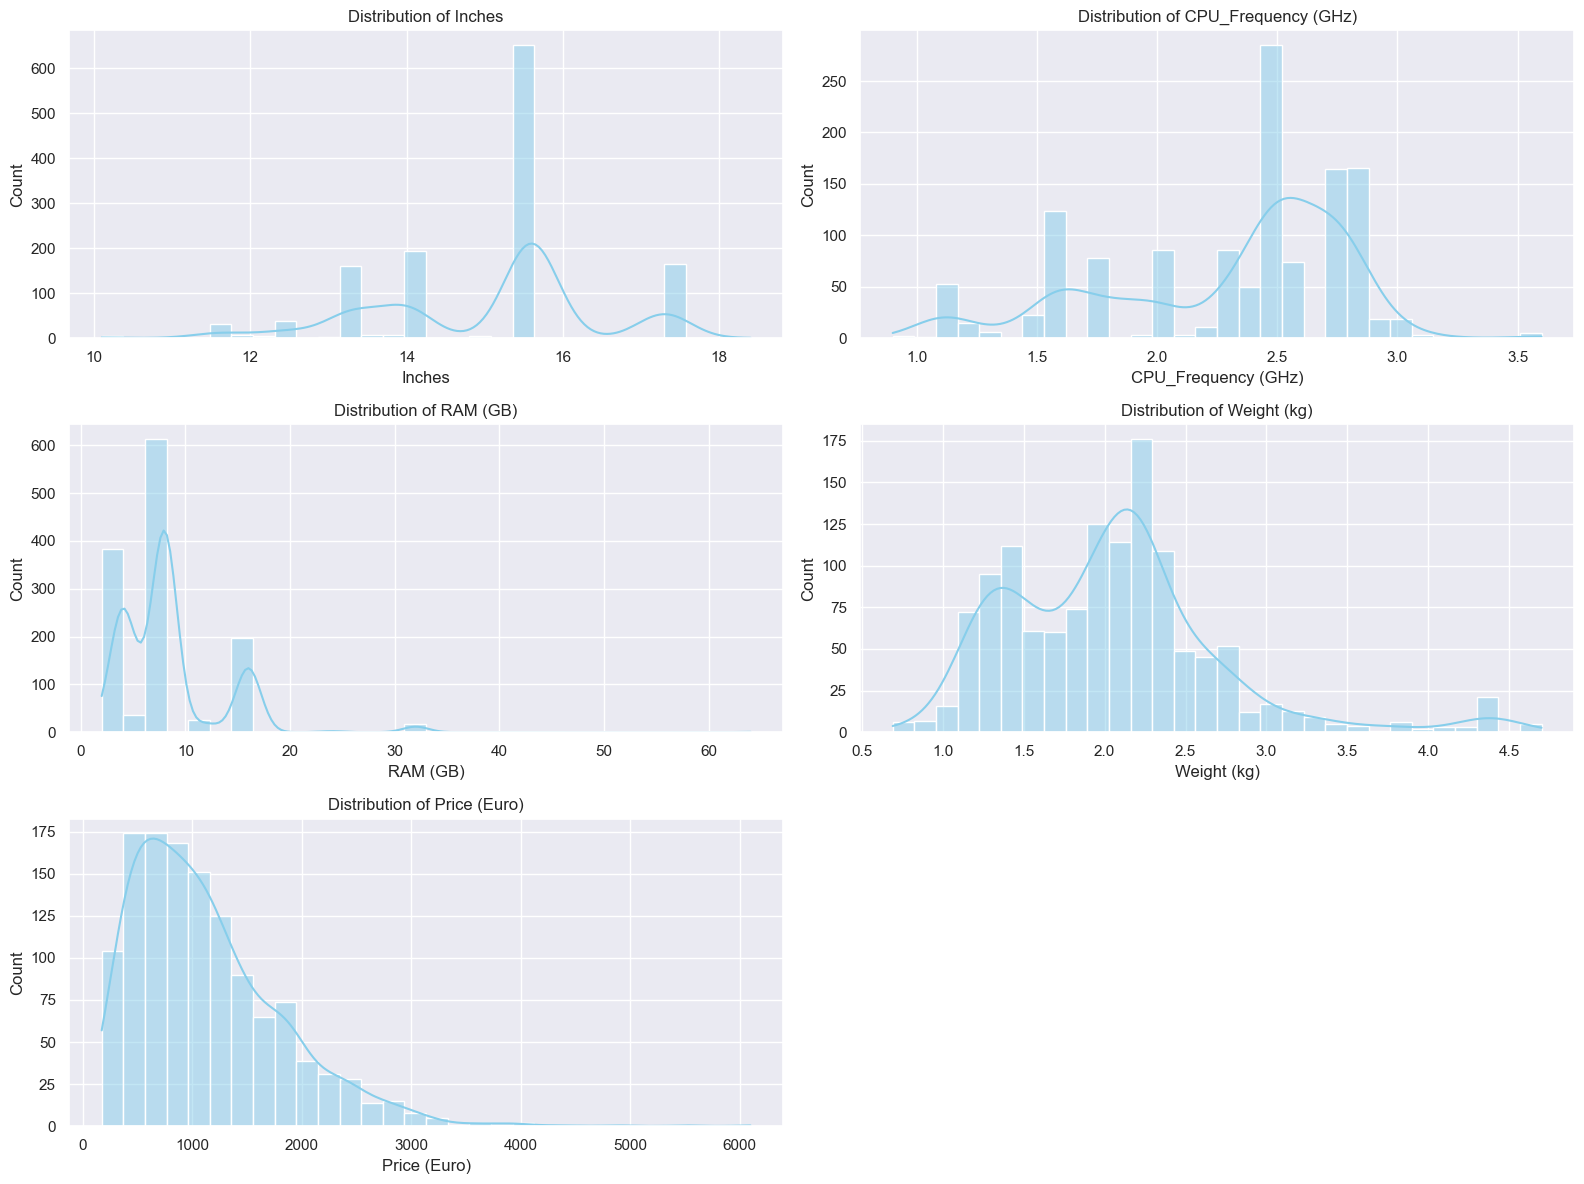

In [7]:
# 1. Numerical Feature

# Set visual style
sns.set(style='darkgrid')

num_features =['Inches','CPU_Frequency (GHz)','RAM (GB)','Weight (kg)','Price (Euro)']

plt.figure(figsize=(16, 12))
for i, feature in enumerate(num_features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[feature], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

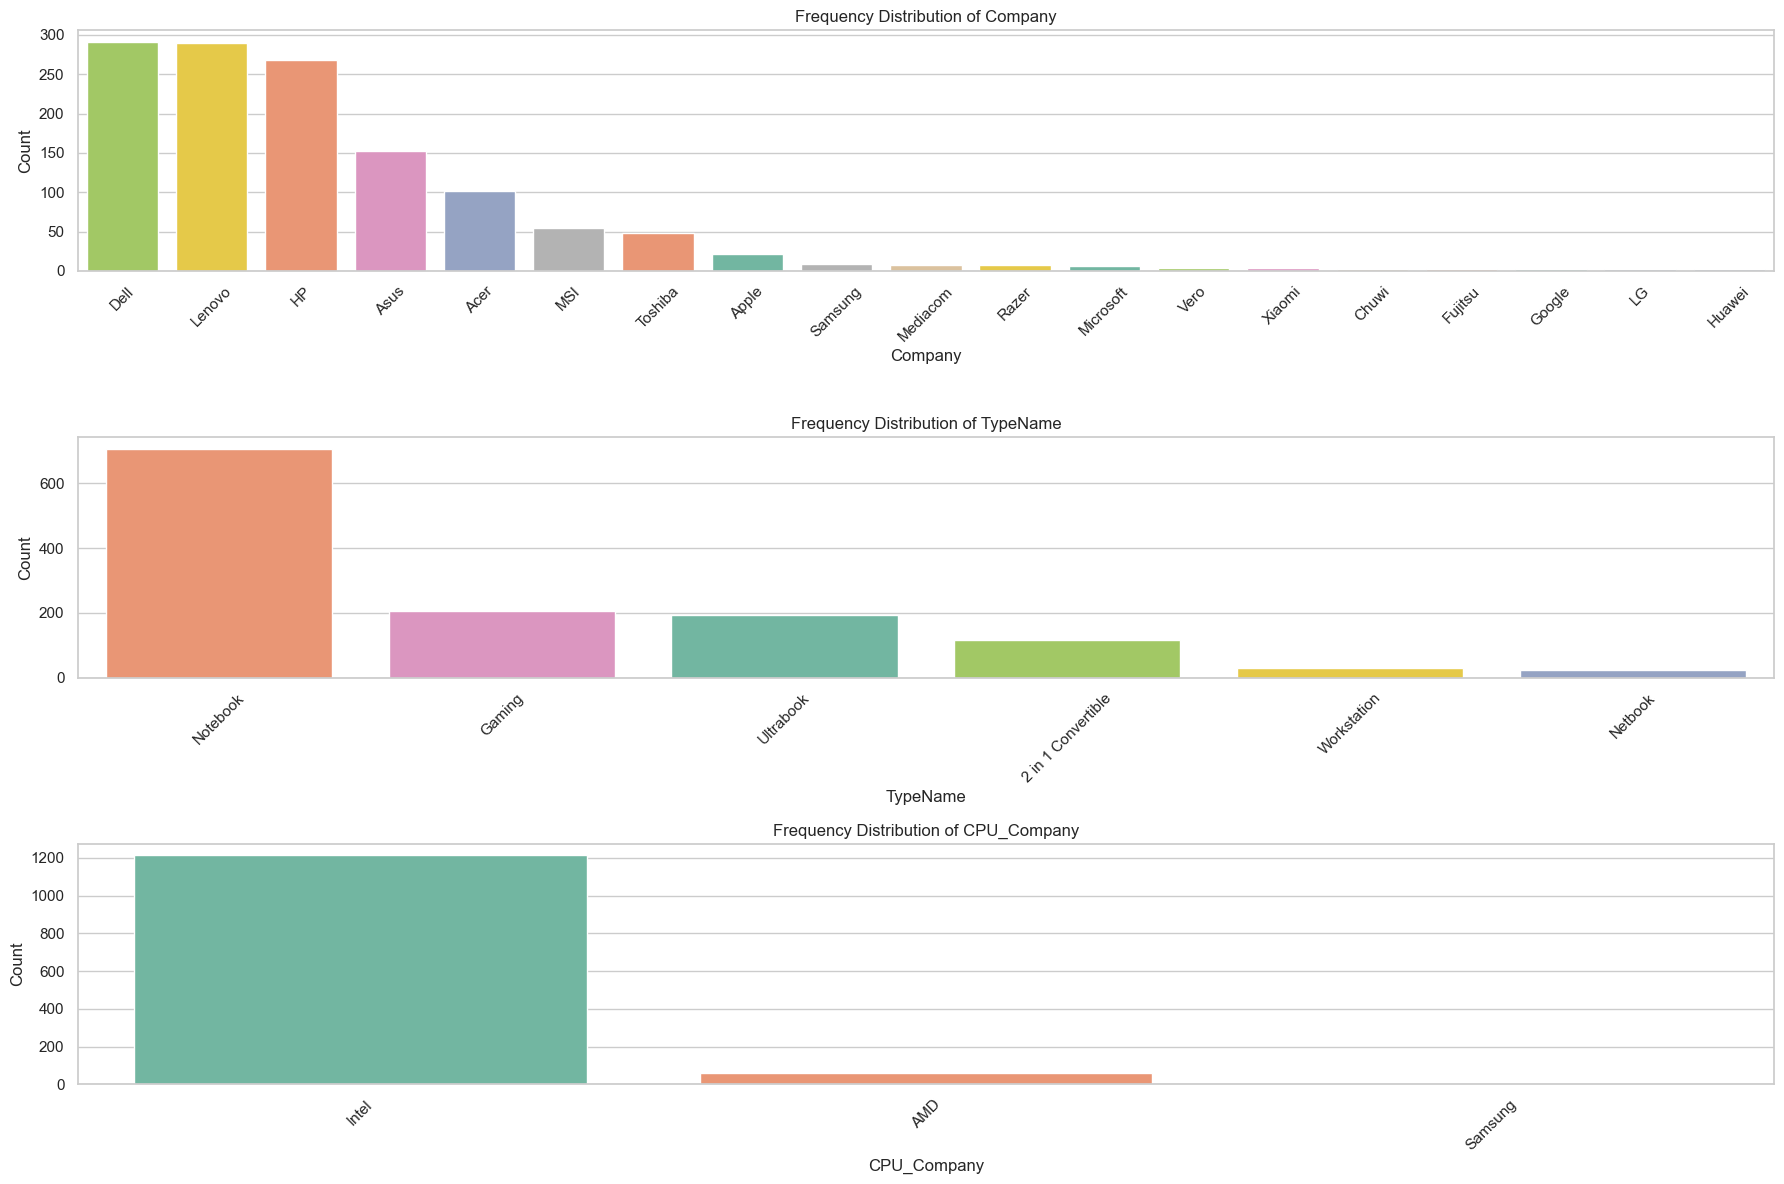

In [8]:
# 2. Categorical Feature

# Set Seaborn style
sns.set(style='whitegrid')

# Define the categorical features
cat_features = ['Company', 'TypeName', 'CPU_Company']

# Plot count plots for each categorical feature
plt.figure(figsize=(18, 12))

for i, feature in enumerate(cat_features, 1):
    plt.subplot(3, 1, i)
    sns.countplot(data=df,x=feature,hue=feature,legend=False,order=df[feature].value_counts().index,palette="Set2")
    plt.title(f'Frequency Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 2.	Bivariate Analysis

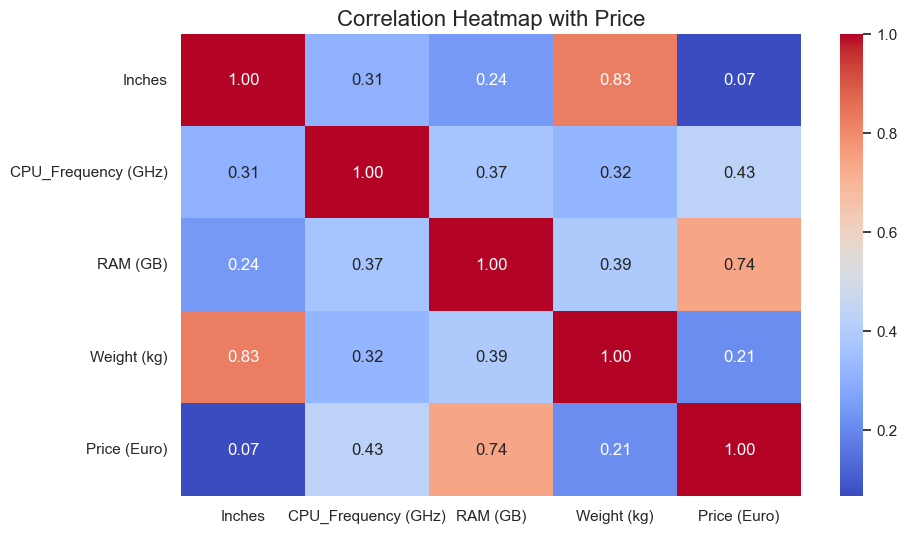

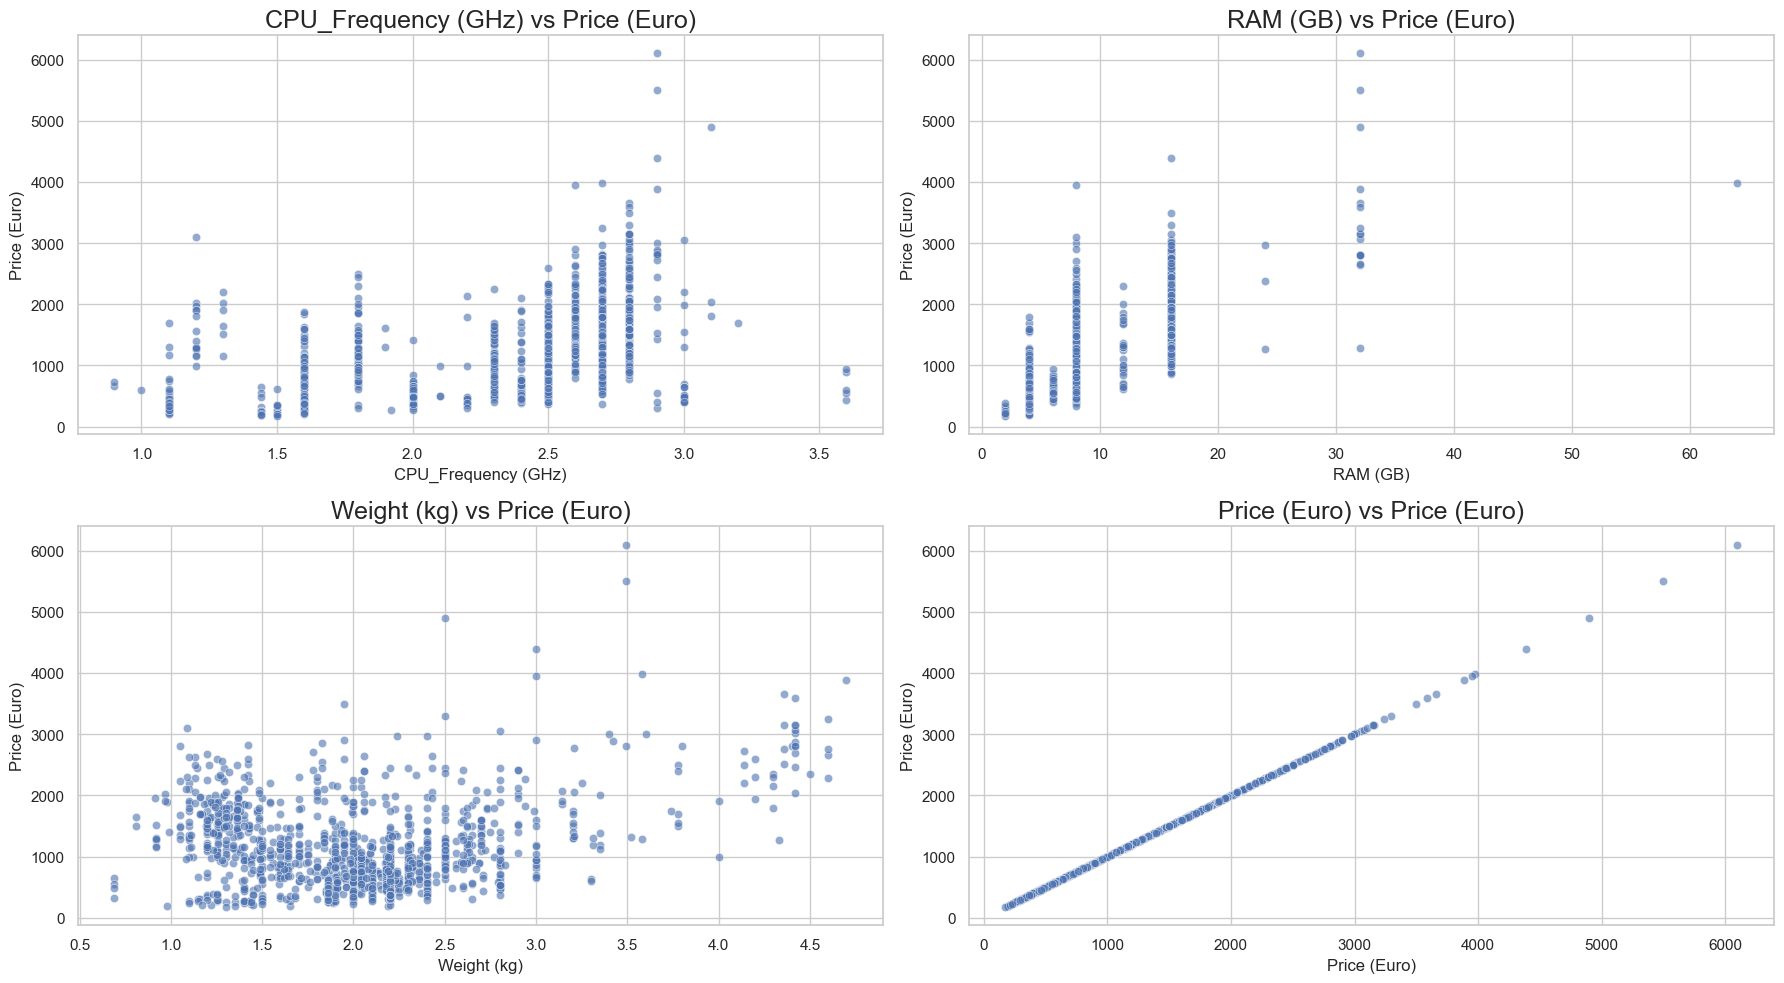

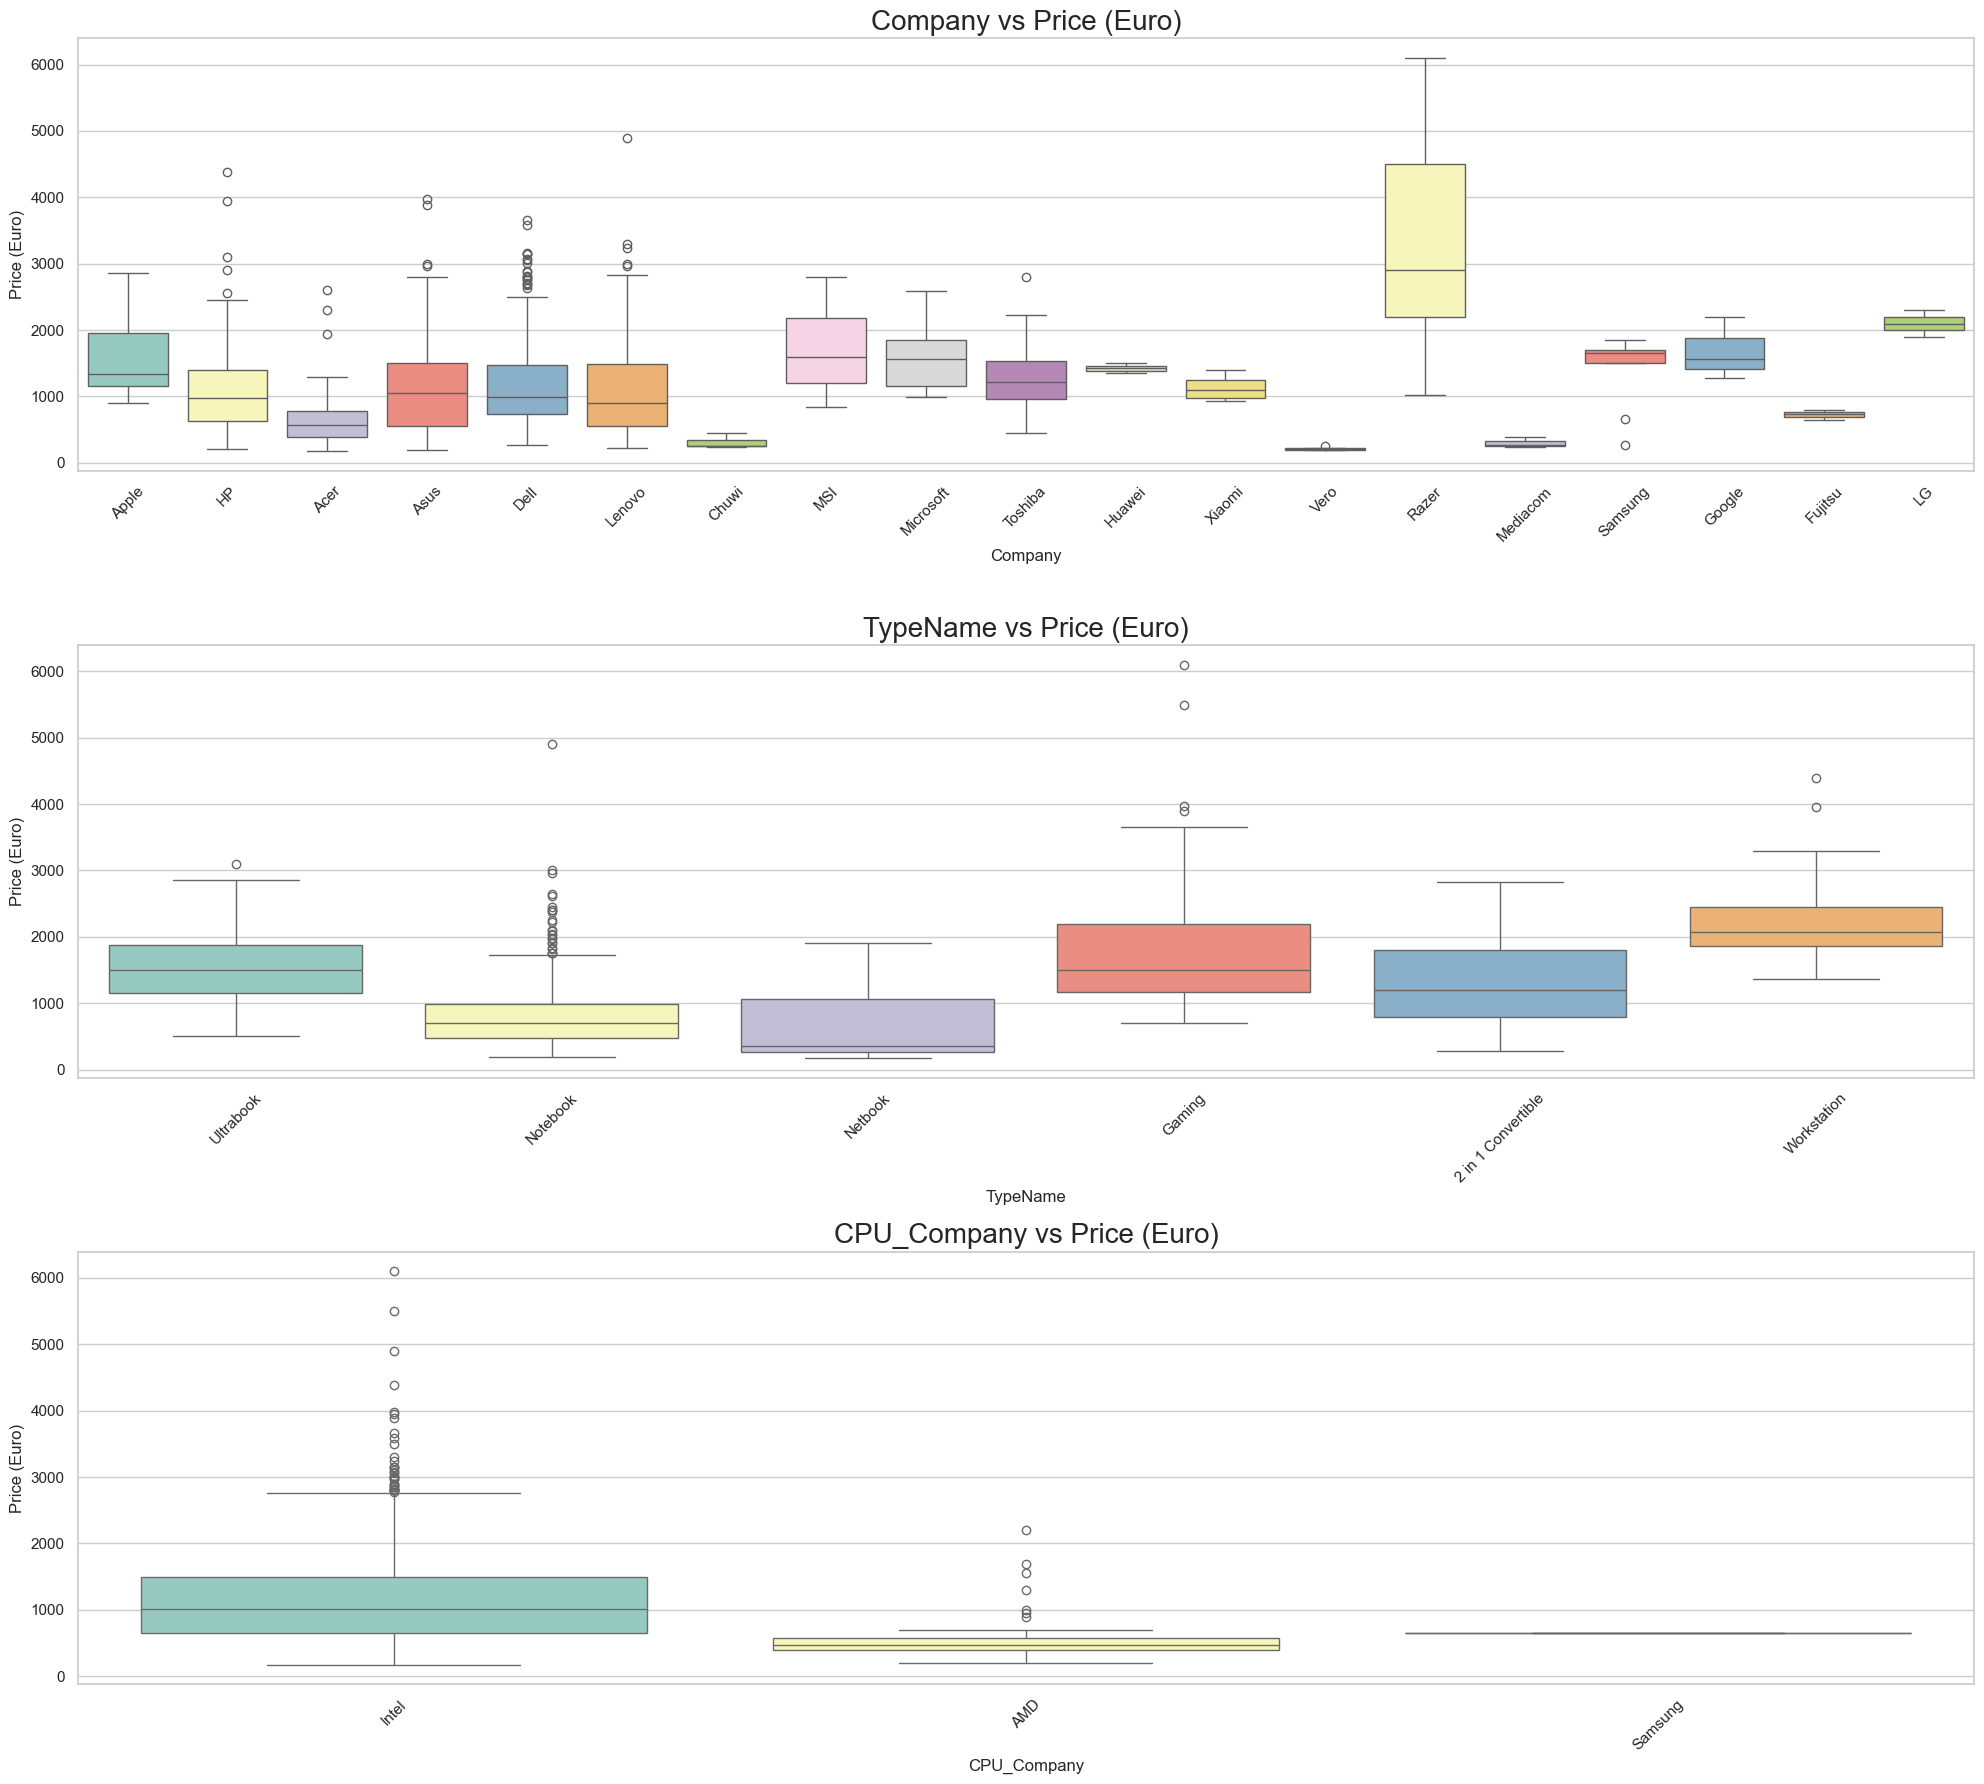

In [9]:
sns.set(style="whitegrid")

#  Correlation heatmap for numerical features

plt.figure(figsize=(10, 6))

corr_matrix=df[num_features].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap with Price',fontsize=16)
plt.show()

# 2. Scatter plots for numerical features vs Price
plt.figure(figsize=(18, 10))
for i, feature in enumerate(num_features[1:], 1):  # Skip 'Price' itself
    plt.subplot(2, 2, i)
    sns.scatterplot(data=df, x=feature, y='Price (Euro)', alpha=0.6)
    plt.title(f'{feature} vs Price (Euro)',fontsize=18)
plt.tight_layout()
plt.show()

# 3. Box plots for categorical features vs Price

plt.figure(figsize=(20, 18))
for i, feature in enumerate(cat_features, 1):
    plt.subplot(3, 1, i)
    sns.boxplot(data=df, x=feature, y='Price (Euro)', hue=feature, legend=False, palette='Set3')
    plt.title(f'{feature} vs Price (Euro)',fontsize=20)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

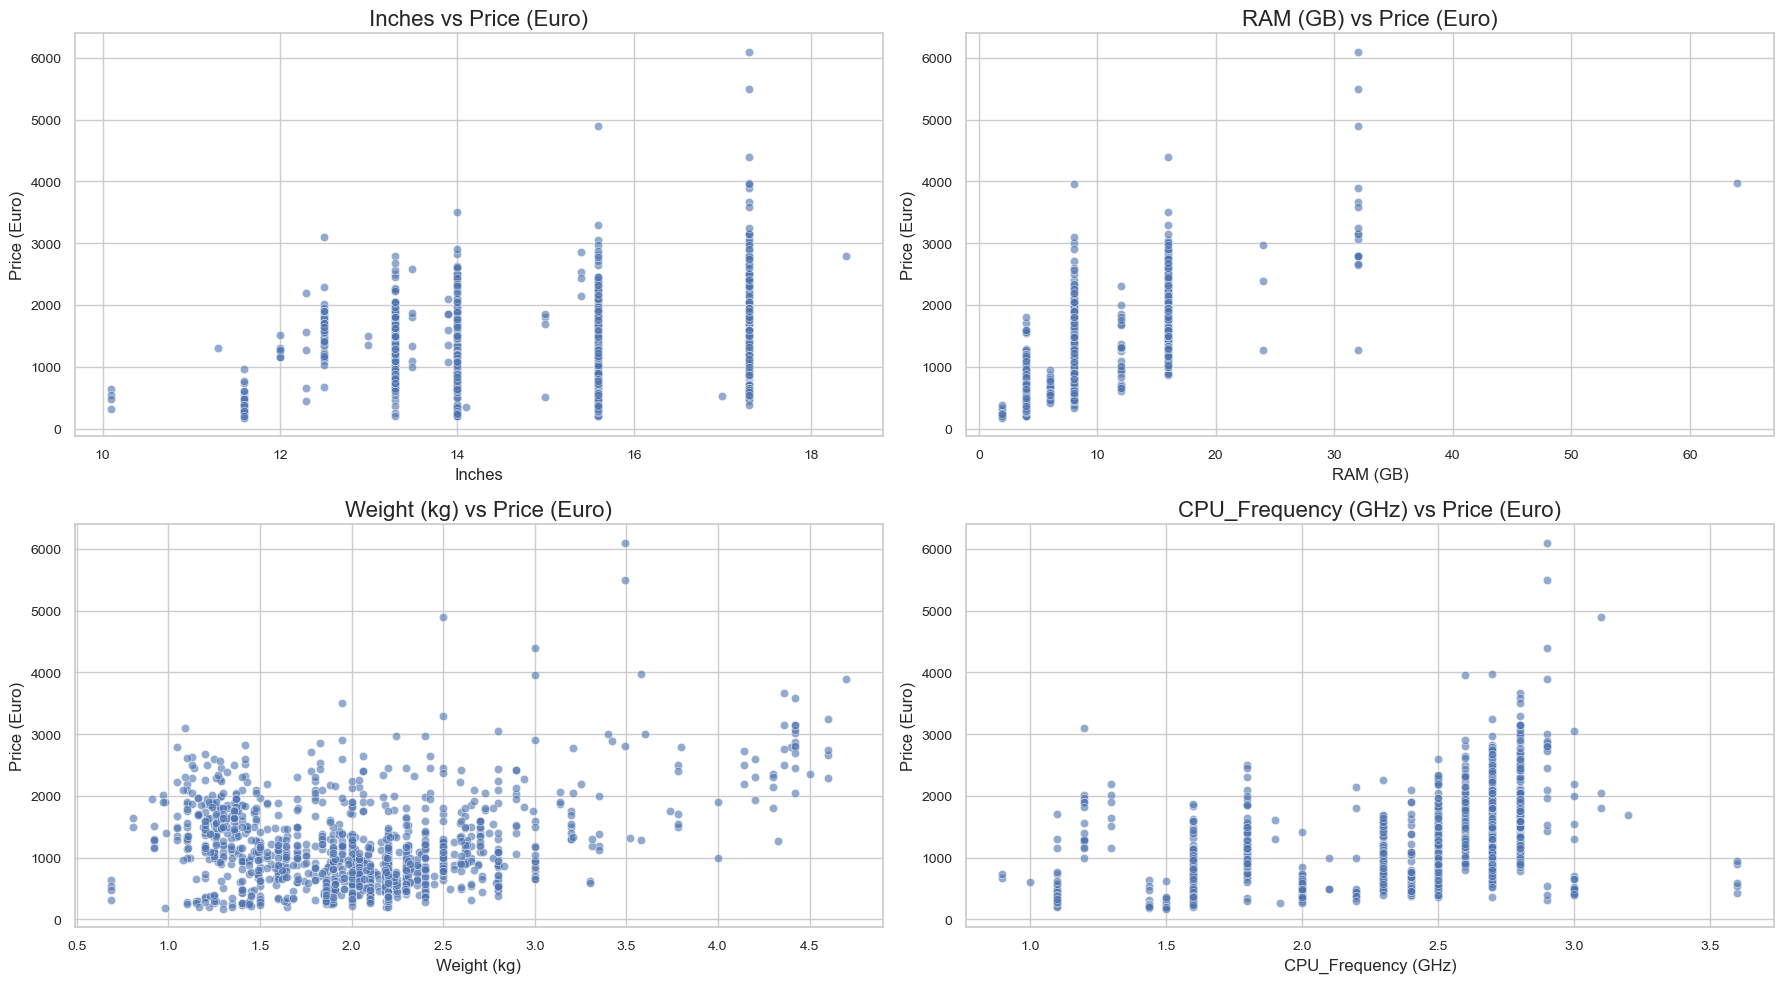

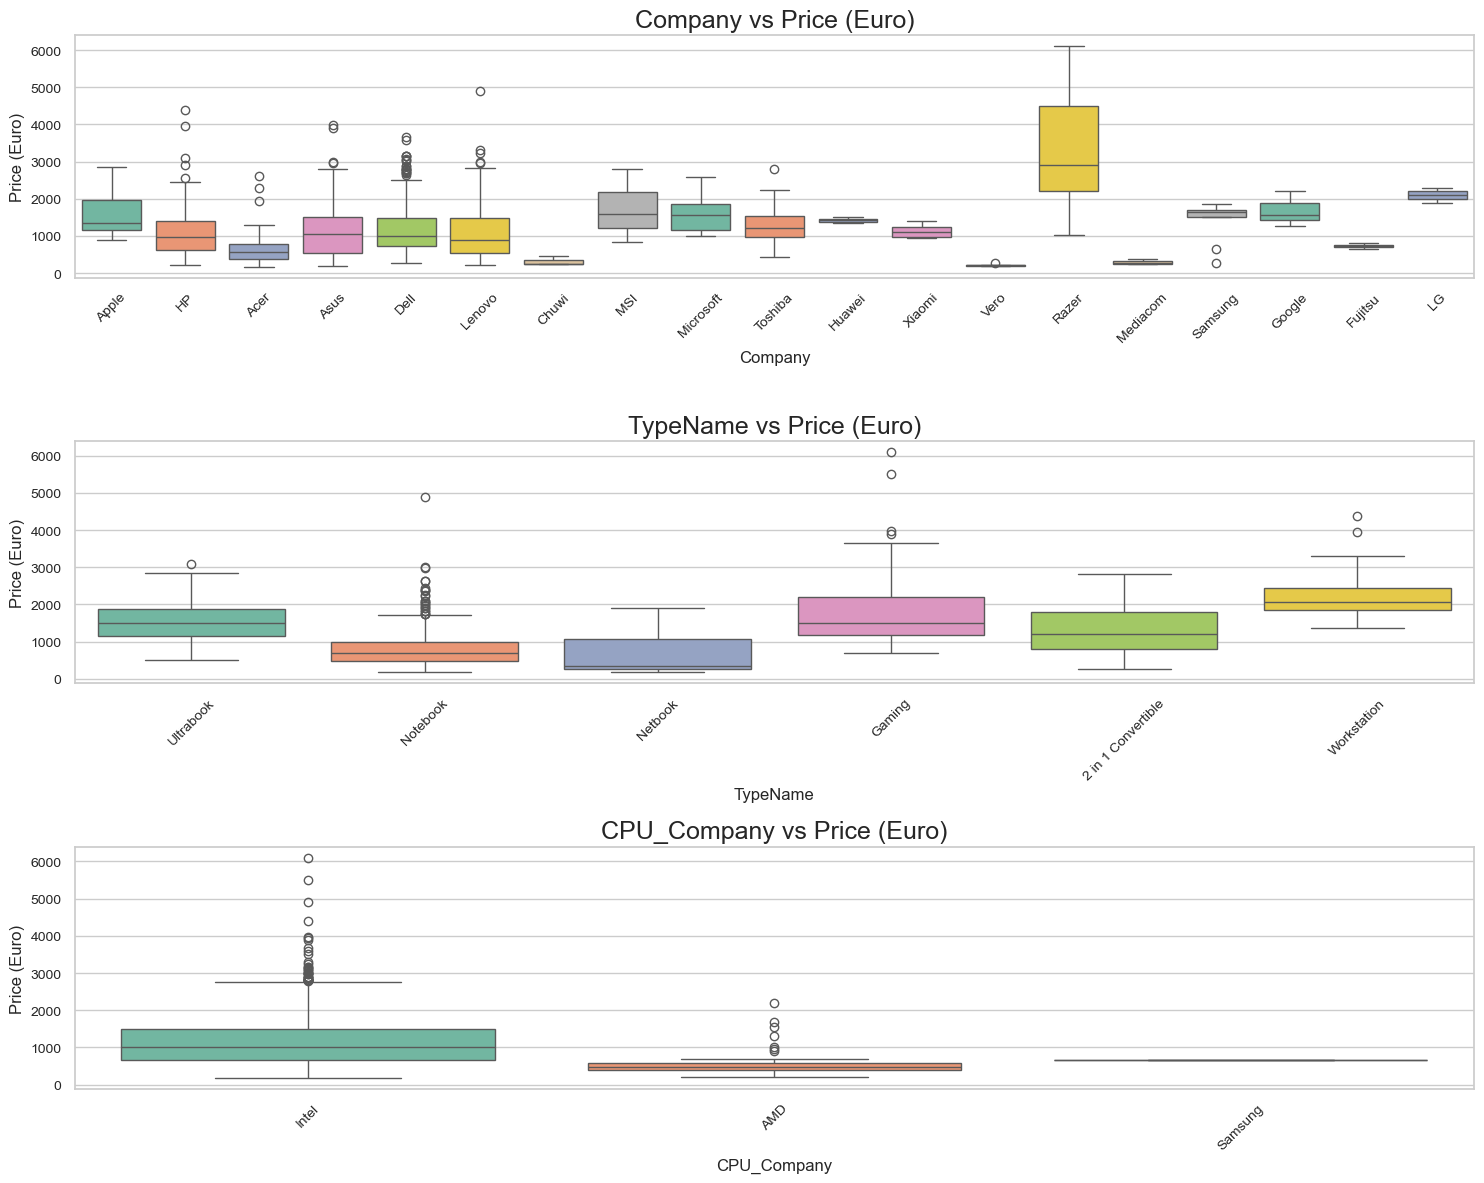

In [10]:
sns.set(style="whitegrid")

# Scatter Plots (Numerical vs Price)

numerical_features = ['Inches', 'RAM (GB)', 'Weight (kg)', 'CPU_Frequency (GHz)']

plt.figure(figsize=(18, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(data=df, x=feature, y='Price (Euro)', alpha=0.6)
    plt.title(f'{feature} vs Price (Euro)', fontsize=16)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Price (Euro)', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

#  Box Plots (Categorical vs Price)

categorical_features = ['Company', 'TypeName', 'CPU_Company']

plt.figure(figsize=(15, 12))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 1, i)
    sns.boxplot(data=df,x=feature,y='Price (Euro)',hue=feature,legend=False,palette='Set2')
    plt.title(f'{feature} vs Price (Euro)', fontsize=18)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Price (Euro)', fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

### 3.	Multivariate Analysis

#### 	Explore interactions between multiple features using heatmaps, pair plots, or other visualization techniques.

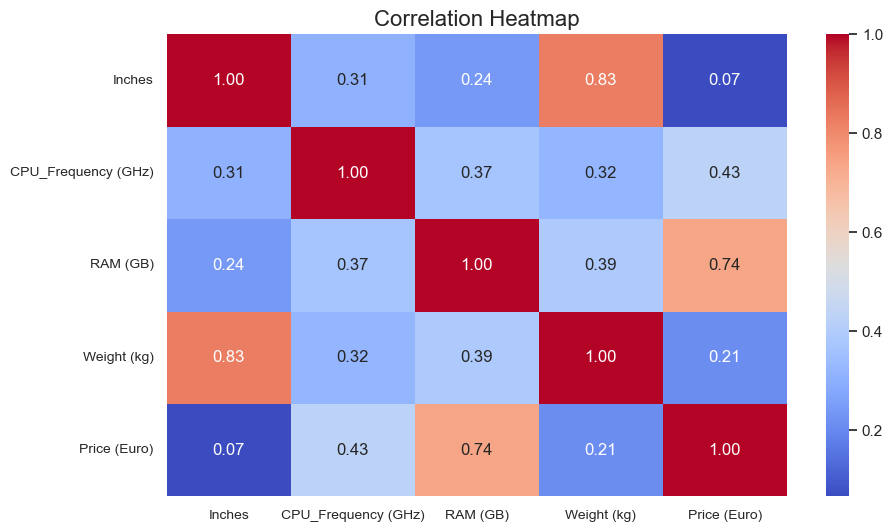

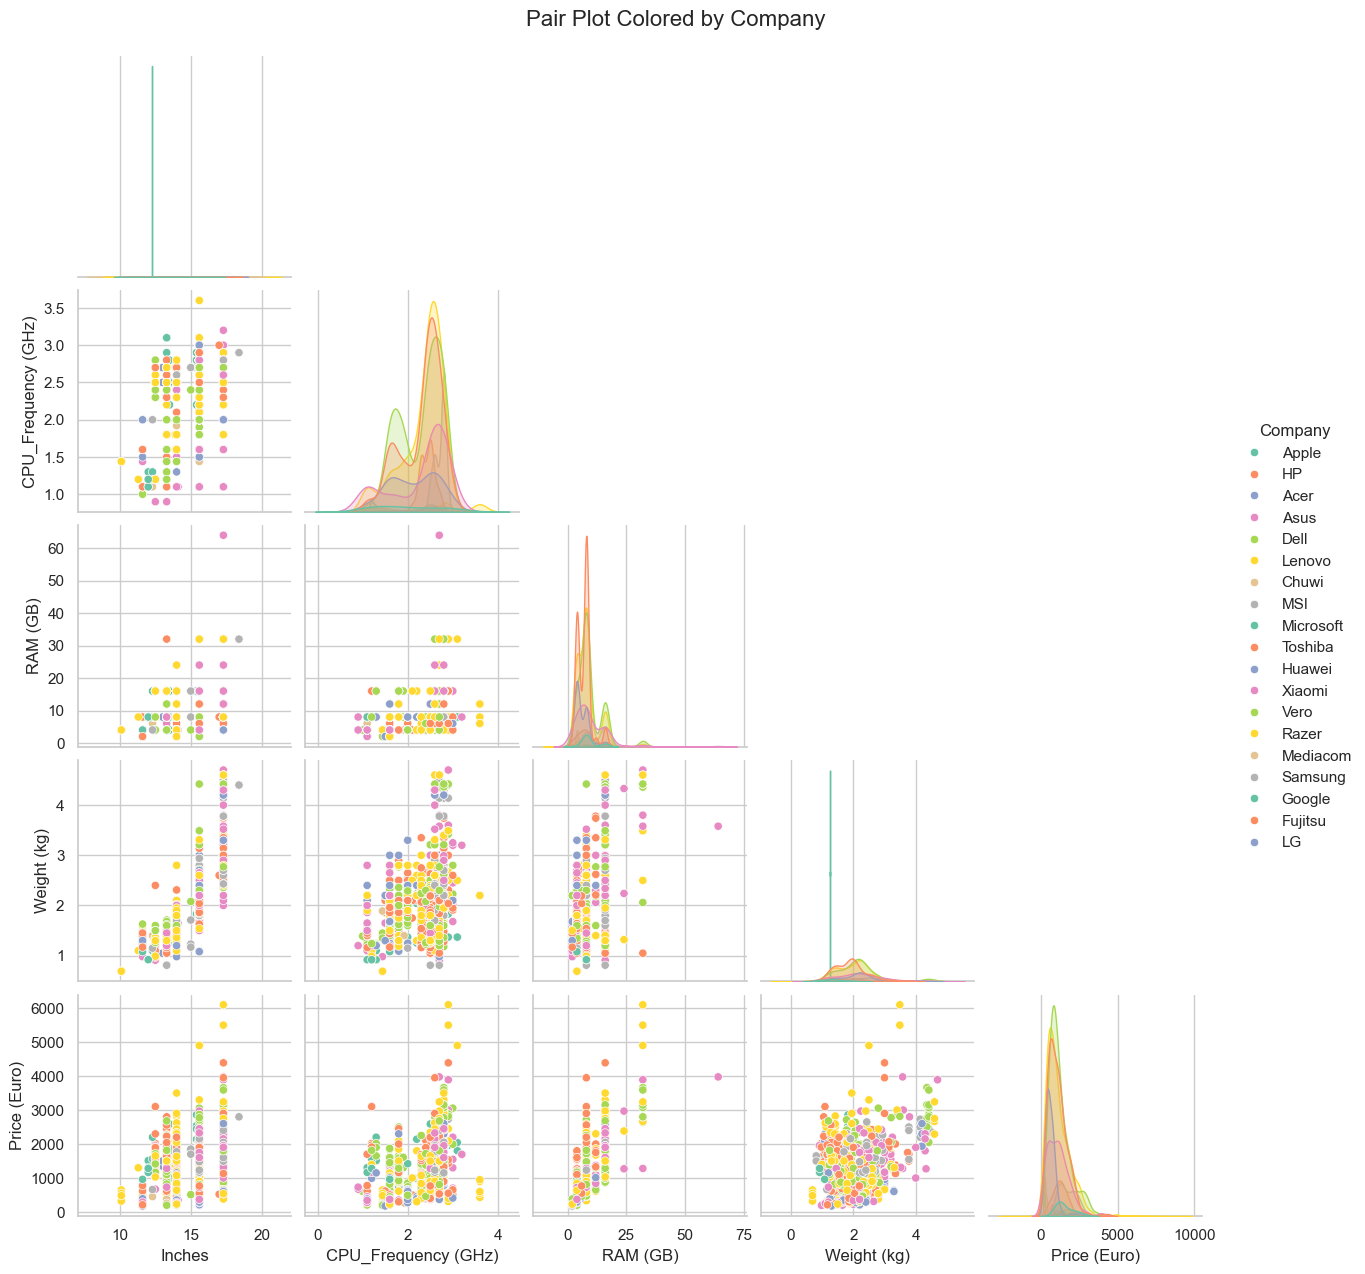

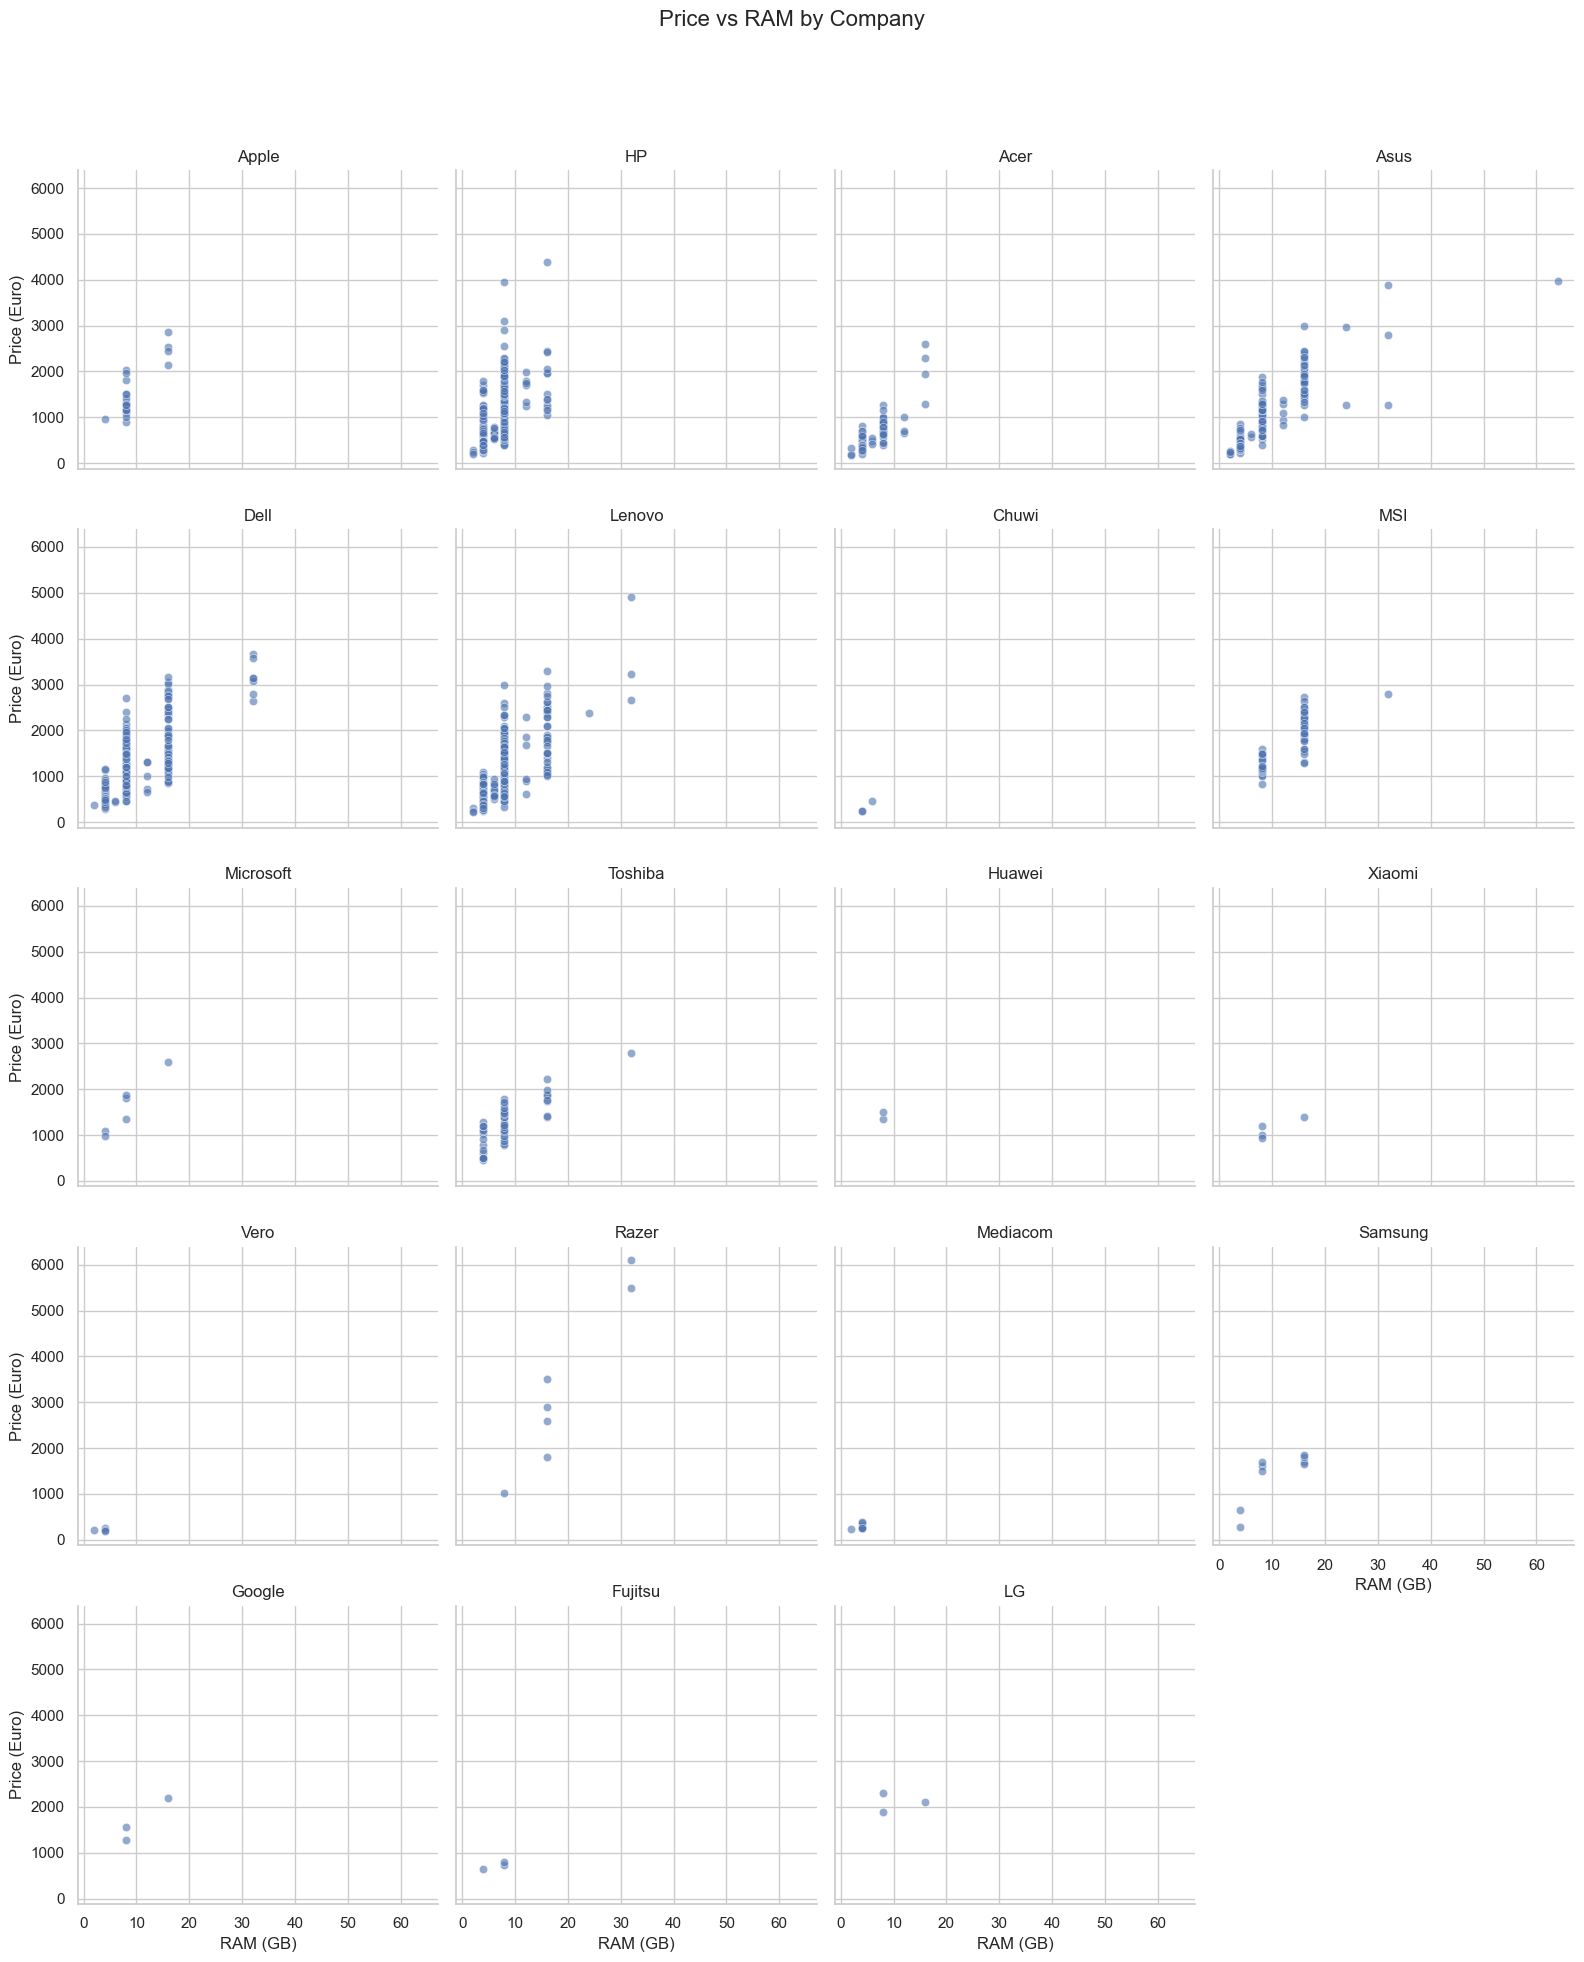

In [11]:
sns.set(style='whitegrid')

# Correlation Heatmap (Numerical)

plt.figure(figsize=(10, 6))
corr = df[num_features].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


# Pair Plot (Numerical + Categorical Hue)

sns.pairplot(df[num_features + ['Company']], hue='Company', palette='Set2', corner=True)
plt.suptitle("Pair Plot Colored by Company", y=1.02, fontsize=16)
plt.show()

#  FacetGrid (optional): Price vs RAM for each Company

g = sns.FacetGrid(df, col="Company", col_wrap=4, height=4)
g.map_dataframe(sns.scatterplot, x="RAM (GB)", y="Price (Euro)", alpha=0.6)
g.set_titles("{col_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Price vs RAM by Company", fontsize=16)
plt.show()

## Part 3: Data Cleaning

In [12]:
df.isnull().sum()

Company                0
Product                0
TypeName               0
Inches                 0
ScreenResolution       0
CPU_Company            0
CPU_Type               0
CPU_Frequency (GHz)    0
RAM (GB)               0
Memory                 0
GPU_Company            0
GPU_Type               0
OpSys                  0
Weight (kg)            0
Price (Euro)           0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
#  Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Standardize all categorical string values
for col in categorical_cols:
    df[col] = df[col].astype(str).str.strip()       # Remove leading/trailing spaces
    df[col] = df[col].str.replace(r"\s+", " ", regex=True)  # Remove multiple spaces
    df[col] = df[col].str.title()                   # Standardize to title case (e.g., "Dell", "Windows 10")

## Part 4: Data Preprocessing

#### 4.	Transform or engineer features to improve data representation 
- (e.g., create separate columns for HDD and SSD storage from Memory).

- Here doing because After encoding and scaling it will be complex and maybe result not come perfectly

In [15]:
import re

# Preview the 'Memory' column
print(df['Memory'].head())

# Define a function to extract HDD and SSD sizes in GB
def extract_storage(memory_str):
    memory_str = memory_str.upper()
    hdd = 0
    ssd = 0

    # Find HDD
    hdd_match = re.search(r'(\d+)(TB|GB)\s*HDD', memory_str)
    if hdd_match:
        size, unit = hdd_match.groups()
        hdd = int(size) * (1024 if unit == 'TB' else 1)

    # Find SSD
    ssd_match = re.search(r'(\d+)(TB|GB)\s*SSD', memory_str)
    if ssd_match:
        size, unit = ssd_match.groups()
        ssd = int(size) * (1024 if unit == 'TB' else 1)

    return pd.Series([hdd, ssd])

# Apply the function to the 'Memory' column
df[['HDD (GB)', 'SSD (GB)']] = df['Memory'].apply(extract_storage)

# Drop the original 'Memory' column if desired
# df.drop(columns=['Memory'], inplace=True)

# Preview the updated dataframe
print(df[['Memory', 'HDD (GB)', 'SSD (GB)']].head())

0              128Gb Ssd
1    128Gb Flash Storage
2              256Gb Ssd
3              512Gb Ssd
4              256Gb Ssd
Name: Memory, dtype: object
                Memory  HDD (GB)  SSD (GB)
0            128Gb Ssd         0       128
1  128Gb Flash Storage         0         0
2            256Gb Ssd         0       256
3            512Gb Ssd         0       512
4            256Gb Ssd         0       256


#### 1.	Encode categorical variables 

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
# Identify categorical columns

categorical_cols = df.select_dtypes(include='object').columns.tolist()

df_encoded=df.copy()
for col in categorical_cols:
    df_encoded[col]=le.fit_transform(df_encoded[col])
df_encoded

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro),HDD (GB),SSD (GB)
0,1,289,4,13.3,23,1,29,2.3,8,4,2,56,4,1.37,1339.69,0,128
1,1,288,4,13.3,1,1,29,1.8,8,2,2,50,4,1.34,898.94,0,0
2,7,50,3,15.6,8,1,35,2.5,8,16,2,52,5,1.86,575.00,0,256
3,1,289,4,15.4,25,1,43,2.7,16,29,0,76,4,1.83,2537.45,0,512
4,1,289,4,13.3,23,1,29,3.1,8,16,2,57,4,1.37,1803.60,0,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,9,543,0,14.0,13,1,44,2.5,4,4,2,46,6,1.80,638.00,0,128
1271,9,551,0,13.3,19,1,44,2.5,16,29,2,46,6,1.30,1499.00,0,512
1272,9,191,3,14.0,0,1,19,1.6,2,35,2,39,6,1.50,229.00,0,0
1273,7,2,3,15.6,0,1,44,2.5,6,10,0,88,6,2.19,764.00,1024,0


In [17]:
df=df_encoded

In [18]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro),HDD (GB),SSD (GB)
0,1,289,4,13.3,23,1,29,2.3,8,4,2,56,4,1.37,1339.69,0,128
1,1,288,4,13.3,1,1,29,1.8,8,2,2,50,4,1.34,898.94,0,0
2,7,50,3,15.6,8,1,35,2.5,8,16,2,52,5,1.86,575.00,0,256
3,1,289,4,15.4,25,1,43,2.7,16,29,0,76,4,1.83,2537.45,0,512
4,1,289,4,13.3,23,1,29,3.1,8,16,2,57,4,1.37,1803.60,0,256


#### 2.	Scale numerical features 

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Load dataset

# Features to scale
scale_features = ['Product','Inches', 'ScreenResolution','CPU_Type',
                  'CPU_Frequency (GHz)','Memory','GPU_Type','RAM (GB)', 'Weight (kg)','HDD (GB)','SSD (GB)']

# Initialize the scaler


# Fit and transform the selected columns
df[scale_features] = scaler.fit_transform(df[scale_features])

# Output the scaled values
print("Scaled features:\n", df[scale_features].head())


Scaled features:
     Product    Inches  ScreenResolution  CPU_Type  CPU_Frequency (GHz)  \
0 -0.021034 -1.205746          1.737738 -0.779839            -0.005918   
1 -0.027331 -1.205746         -1.056229 -0.779839            -0.998674   
2 -1.526017  0.403873         -0.167240 -0.399926             0.391185   
3 -0.021034  0.263906          1.991735  0.106624             0.788288   
4 -0.021034 -1.205746          1.737738 -0.779839             1.582493   

     Memory  GPU_Type  RAM (GB)  Weight (kg)  HDD (GB)  SSD (GB)  
0 -1.549159  0.340992 -0.086499    -1.002380 -0.796585 -0.308469  
1 -1.801288  0.113108 -0.086499    -1.047227 -0.796585 -0.998051  
2 -0.036386  0.189069 -0.086499    -0.269871 -0.796585  0.381112  
3  1.602452  1.100606  1.483418    -0.314718 -0.796585  1.760275  
4 -0.036386  0.378973 -0.086499    -1.002380 -0.796585  0.381112  


In [20]:
df[scale_features]

,Product,Inches,ScreenResolution,CPU_Type,CPU_Frequency (GHz),Memory,GPU_Type,RAM (GB),Weight (kg),HDD (GB),SSD (GB)
0,-0.021034,-1.205746,1.737738,-0.779839,-0.005918,-1.549159,0.340992,-0.086499,-1.002380,-0.796585,-0.308469
1,-0.027331,-1.205746,-1.056229,-0.779839,-0.998674,-1.801288,0.113108,-0.086499,-1.047227,-0.796585,-0.998051
2,-1.526017,0.403873,-0.167240,-0.399926,0.391185,-0.036386,0.189069,-0.086499,-0.269871,-0.796585,0.381112
3,-0.021034,0.263906,1.991735,0.106624,0.788288,1.602452,1.100606,1.483418,-0.314718,-0.796585,1.760275
4,-0.021034,-1.205746,1.737738,-0.779839,1.582493,-0.036386,0.378973,-0.086499,-1.002380,-0.796585,0.381112
...,...,...,...,...,...,...,...,...,...,...,...
1270,1.578403,-0.715862,0.467753,0.169943,0.391185,-1.549159,-0.038815,-0.871458,-0.359566,-0.796585,-0.308469
1271,1.628779,-1.205746,1.229744,0.169943,0.391185,1.602452,-0.038815,1.483418,-1.107024,-0.796585,1.760275
1272,-0.638140,-0.715862,-1.183228,-1.413026,-1.395777,2.358839,-0.304680,-1.263937,-0.808041,-0.796585,-0.998051
1273,-1.828273,0.403873,-1.183228,0.169943,0.391185,-0.792772,1.556375,-0.478979,0.223452,1.142856,-0.998051


In [21]:
df

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro),HDD (GB),SSD (GB)
0,1,-0.021034,4,-1.205746,1.737738,1,-0.779839,-0.005918,-0.086499,-1.549159,2,0.340992,4,-1.002380,1339.69,-0.796585,-0.308469
1,1,-0.027331,4,-1.205746,-1.056229,1,-0.779839,-0.998674,-0.086499,-1.801288,2,0.113108,4,-1.047227,898.94,-0.796585,-0.998051
2,7,-1.526017,3,0.403873,-0.167240,1,-0.399926,0.391185,-0.086499,-0.036386,2,0.189069,5,-0.269871,575.00,-0.796585,0.381112
3,1,-0.021034,4,0.263906,1.991735,1,0.106624,0.788288,1.483418,1.602452,0,1.100606,4,-0.314718,2537.45,-0.796585,1.760275
4,1,-0.021034,4,-1.205746,1.737738,1,-0.779839,1.582493,-0.086499,-0.036386,2,0.378973,4,-1.002380,1803.60,-0.796585,0.381112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,9,1.578403,0,-0.715862,0.467753,1,0.169943,0.391185,-0.871458,-1.549159,2,-0.038815,6,-0.359566,638.00,-0.796585,-0.308469
1271,9,1.628779,0,-1.205746,1.229744,1,0.169943,0.391185,1.483418,1.602452,2,-0.038815,6,-1.107024,1499.00,-0.796585,1.760275
1272,9,-0.638140,3,-0.715862,-1.183228,1,-1.413026,-1.395777,-1.263937,2.358839,2,-0.304680,6,-0.808041,229.00,-0.796585,-0.998051
1273,7,-1.828273,3,0.403873,-1.183228,1,0.169943,0.391185,-0.478979,-0.792772,0,1.556375,6,0.223452,764.00,1.142856,-0.998051


#### 3.	Identify and handle outliers in numerical columns.

In [22]:
# Select numerical columns (you can specify or auto-select)

num_cols = ['Price (Euro)', 'Inches', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Weight (kg)']

# Function to detect and remove outliers using IQR
def remove_outliers_iqr(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound=Q1 -1.5*IQR
    upper_bound=Q3+1.5*IQR
    print(f'{column} - Before : {df.shape[0]} rows')
    df=df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    print(f'{column} - After: {df.shape[0]} rows\n')
    return df

# Apply to each numerical column
for col in num_cols:
    df = remove_outliers_iqr(df, col)


Price (Euro) - Before : 1275 rows
Price (Euro) - After: 1247 rows

Inches - Before : 1247 rows
Inches - After: 1210 rows

CPU_Frequency (GHz) - Before : 1210 rows
CPU_Frequency (GHz) - After: 1208 rows

RAM (GB) - Before : 1208 rows
RAM (GB) - After: 1014 rows

Weight (kg) - Before : 1014 rows
Weight (kg) - After: 1000 rows



In [26]:
df

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro),HDD (GB),SSD (GB)
0,1,-0.021034,4,-1.205746,1.737738,1,-0.779839,-0.005918,-0.086499,-1.549159,2,0.340992,4,-1.002380,1339.69,-0.796585,-0.308469
1,1,-0.027331,4,-1.205746,-1.056229,1,-0.779839,-0.998674,-0.086499,-1.801288,2,0.113108,4,-1.047227,898.94,-0.796585,-0.998051
2,7,-1.526017,3,0.403873,-0.167240,1,-0.399926,0.391185,-0.086499,-0.036386,2,0.189069,5,-0.269871,575.00,-0.796585,0.381112
4,1,-0.021034,4,-1.205746,1.737738,1,-0.779839,1.582493,-0.086499,-0.036386,2,0.378973,4,-1.002380,1803.60,-0.796585,0.381112
5,0,-1.475641,3,0.403873,-1.183228,0,-1.919576,1.383942,-0.871458,1.224259,0,1.404452,6,0.088909,400.00,0.150408,-0.998051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,2,1.521730,3,0.403873,-1.183228,1,0.169943,0.391185,-0.871458,1.224259,3,-1.596024,6,0.238401,720.32,0.150408,-0.998051
1270,9,1.578403,0,-0.715862,0.467753,1,0.169943,0.391185,-0.871458,-1.549159,2,-0.038815,6,-0.359566,638.00,-0.796585,-0.308469
1272,9,-0.638140,3,-0.715862,-1.183228,1,-1.413026,-1.395777,-1.263937,2.358839,2,-0.304680,6,-0.808041,229.00,-0.796585,-0.998051
1273,7,-1.828273,3,0.403873,-1.183228,1,0.169943,0.391185,-0.478979,-0.792772,0,1.556375,6,0.223452,764.00,1.142856,-0.998051


## Part 5: Model Building and Evaluation

### 1.	Split the dataset 

In [24]:
x=df.drop(columns='Price (Euro)',axis=1)

In [27]:
y=df['Price (Euro)']

In [25]:
x.shape

(1000, 16)

In [28]:
y.shape

(1000,)

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

### 2.	Train regression models such as Linear Regression,Decision Tree,  Random Forest, and Gradient Boosting.

#### Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

#### GridSearchCV Linear Regression

In [42]:
from sklearn.model_selection import GridSearchCV

param_grid_lr={'fit_intercept':[True,False]}
grid_lr=GridSearchCV(lr_model,param_grid_lr,cv=5,scoring='r2')
grid_lr.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]}, scoring='r2')

In [51]:
print("Best Params - Linear Regression:", grid_lr.best_params_)
print("Best R2 Score:", grid_lr.best_score_)

Best Params - Linear Regression: {'fit_intercept': True}
Best R2 Score: 0.6118393849171783


####	Evaluate models using metrics like R², MSE, and RMSE.

In [63]:
from sklearn.metrics import mean_squared_error, r2_score

# Predictions using a trained model
y_lr_pred =lr_model.predict(x_test)

# R-squared (R²)
r2_lr = r2_score(y_test, y_lr_pred)

# Mean Squared Error (MSE)
mse_lr = mean_squared_error(y_test, y_lr_pred)

# Root Mean Squared Error (RMSE)
rmse_lr = np.sqrt(mse_lr)

# Print results
print("Model Evaluation Metrics:")
print(f"R2 Score: {r2_lr:.4f}")
print(f"Mean Squared Error (MSE): {mse_lr:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.4f}")


Model Evaluation Metrics:
R2 Score: 0.6429
Mean Squared Error (MSE): 95692.3251
Root Mean Squared Error (RMSE): 309.3418


#### Decesion Tree

In [34]:
from sklearn.tree import DecisionTreeRegressor
dt_model=DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

#### GridSearchCV Decision Tree

In [45]:
param_grid_dt={ 'max_depth':[3,5,10,None],
               'min_samples_split':[2,5,10],
               'min_samples_leaf':[1,2,4]
              }

grid_dt=GridSearchCV(dt_model,param_grid_dt,cv=5, scoring='r2',verbose=1, n_jobs=-1)
grid_dt.fit(x_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='r2', verbose=1)

In [50]:
print("Best Params - Decision Tree:", grid_dt.best_params_)
print("Best R2 Score:", grid_dt.best_score_)

Best Params - Decision Tree: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best R2 Score: 0.7077595657771901


In [62]:
# Predictions using a trained model
y_dt_pred =dt_model.predict(x_test)

# R-squared (R²)
r2_dt = r2_score(y_test, y_dt_pred)

# Mean Squared Error (MSE)
mse_dt = mean_squared_error(y_test, y_dt_pred)

# Root Mean Squared Error (RMSE)
rmse_dt = np.sqrt(mse_dt)

# Print results
print("Model Evaluation Metrics:")
print(f"R2 Score: {r2_dt:.4f}")
print(f"Mean Squared Error (MSE): {mse_dt:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_dt:.4f}")

Model Evaluation Metrics:
R2 Score: 0.7525
Mean Squared Error (MSE): 66312.7701
Root Mean Squared Error (RMSE): 257.5127


#### RandomForestRegressor

In [36]:
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor(random_state=42,n_estimators=100)
rf_model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

#### GridSearchCV For Random Forest

In [46]:
param_grid_rf={  'n_estimators' : [100,200],
               'max_depth':[None,10,20],
               'min_samples_split':[2,5],
               'min_samples_leaf':[1,2]
              }
grid_rf=GridSearchCV(rf_model,param_grid_rf,cv=5,scoring='r2',verbose=1,n_jobs=-1)
grid_rf.fit(x_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='r2', verbose=1)

In [49]:
print("Best Params - Random Forest:", grid_rf.best_params_)
print("Best R2 Score:", grid_rf.best_score_)

Best Params - Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best R2 Score: 0.8059138789231133


In [64]:
# Predictions using a trained model
y_rf_pred =rf_model.predict(x_test)

# R-squared (R²)
r2_rf = r2_score(y_test, y_rf_pred)

# Mean Squared Error (MSE)
mse_rf = mean_squared_error(y_test, y_rf_pred)

# Root Mean Squared Error (RMSE)
rmse_rf = np.sqrt(mse_rf)

# Print results
print("Model Evaluation Metrics:")
print(f"R2 Score: {r2_rf:.4f}")
print(f"Mean Squared Error (MSE): {mse_rf:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.4f}")

Model Evaluation Metrics:
R2 Score: 0.8198
Mean Squared Error (MSE): 48293.9949
Root Mean Squared Error (RMSE): 219.7589


#### GradientBoostingRegressor

In [38]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model=GradientBoostingRegressor(random_state=42,n_estimators=100)
gb_model.fit(x_train,y_train)

GradientBoostingRegressor(random_state=42)

#### GridSearchCV For Gradient Boosting

In [48]:
param_grid_gb= { 'n_estimators':[100,200],
                'learning_rate': [0.01,0.1],
                'max_depth' :[3,5],
                'min_samples_split':[2,5]
               }
grid_gb=GridSearchCV(gb_model,param_grid_gb,cv=5, scoring='r2',verbose=1,n_jobs=-1)
grid_gb.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='r2', verbose=1)

In [55]:
print("Best Param - Gradient Bossting:" ,grid_gb.best_params_)
print("Best R2 Score:" ,grid_gb.best_score_)

Best Param - Gradient Bossting: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200}
Best R2 Score: 0.840602650611961


In [65]:
# Predictions using a trained model
y_gb_pred =gb_model.predict(x_test)

# R-squared (R²)
r2_gb = r2_score(y_test, y_gb_pred)

# Mean Squared Error (MSE)
mse_gb = mean_squared_error(y_test, y_gb_pred)

# Root Mean Squared Error (RMSE)
rmse_gb = np.sqrt(mse_gb)

# Print results
print("Model Evaluation Metrics:")
print(f"R2 Score: {r2_gb:.4f}")
print(f"Mean Squared Error (MSE): {mse_gb:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_gb:.4f}")

Model Evaluation Metrics:
R2 Score: 0.8538
Mean Squared Error (MSE): 39171.5095
Root Mean Squared Error (RMSE): 197.9179


## Analysis on all model and then after

### 5.	Select the best-performing model based on evaluation results and interpretability.

#### Scores of Linear Regression

- R2 score(0.64) ->  Linear regression model explains 64% of varibitlity in the target variable.

- MSE(95692.3251) -> The is the Average squard error.A higher Value.

- RMSE(309.3418) -> This is more interpretable - This model, model makes an error of about 309 units.

#### Score of Decision Tree
- R2 Score(0.7536) -> The decision tree model explain 75.25%  of the varience in the target variable.
- That's a significant improvement over the linear model(which explained 64%)

- MSE(66,312.7701)  -> The average error dropped by ~ 30%, meaning prediction are much closer to actual values.
- RMSE(257.60) -> RMSE tells that you average prdiction is now arround 258 units, improved from 309 units earlier.

#### Score of Random Forest
- R2 Score(0.8198) -> The Random Forest explains ~ 82% of varience, Which of the variance, which is excellent.
- It captures  both linear and complex non-linear patterns far better than linear regression and even a sigle decision tree

- MSE(48,293.9949) and RMSE(219.7589) ->RMSE is 219.76, meaning the model is off by ~220 units on average a major improvement.

- The error dropped by nearly 90 units compared to linear regression

#### Score of Gradient Boosting Regressor

- R2 score(0.8538) -> The means the gradient boosting has fitted strongly by 85.38%of the variance in target variabl.

- MSE(39,171.5095) and RMSE(197.9179) -> On average ,The prediction are off only 198 units , which is excellent 
 - Error has dropped by:
   - 110 Units from Linear Regression
   - 60 units from Decision Tree
   - 22 units from Random Forsest   

###  Gradient Boosting Regressor is now the best-performing model.
###  It gives the highest R2 score, lowest error, and best generalization to unseen data so far